In [ ]:
###################### Machine Learning Project ######################

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm




In [4]:
# reading traint dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# removing the 'Id' column
df = df.drop('Id',1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


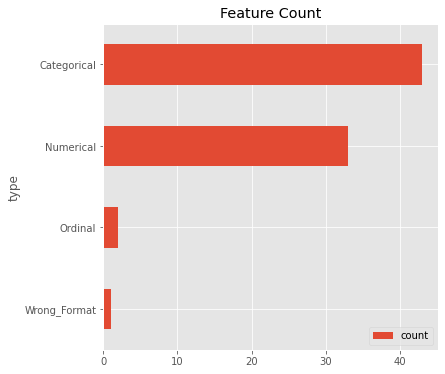

In [6]:
# ploting the count of each type of features
count_ = [['Numerical',33],['Categorical', 43], ['Ordinal',2],['Wrong_Format',1]]
feature_count = pd.DataFrame(count_,columns=['type','count'])
feature_count = feature_count.set_index('type')
matplotlib.rcParams['figure.figsize'] = (6, 6)
feature_count.sort_values('count', ascending=True).plot(kind = 'barh', title = 'Feature Count')

RoofMatl           0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


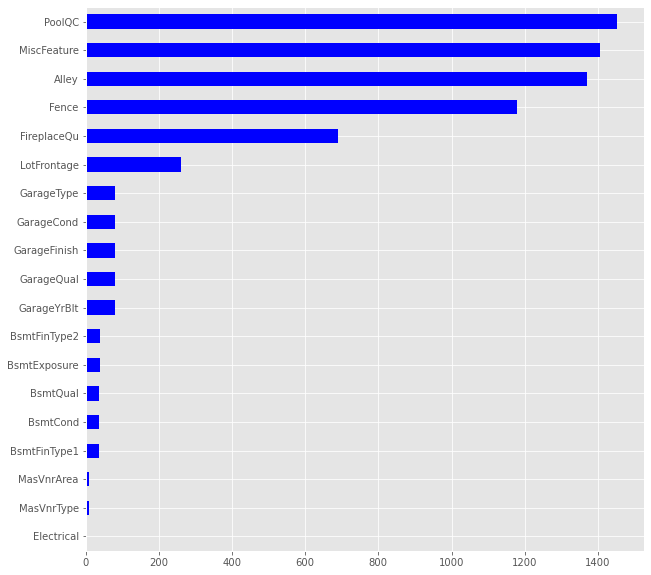

In [7]:
# Null values 

print(np.sum(df.isna()).sort_values().tail(20))
plt.figure(figsize=(10,10))
np.sum(df.isna()).sort_values().tail(19).plot(kind = 'barh', color = 'blue')
plt.show()

In [8]:
# imputation

# for these features, it's highly possible that missing value caused by nonexistance of the the specific feature

df['PoolQC'] = df['PoolQC'].replace(np.nan,'NA')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan,'NA')
df['Alley'] = df['Alley'].replace(np.nan,'NA')
df['Fence'] = df['Fence'].replace(np.nan,'NA')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan,'NA')
df['GarageType'] = df['GarageType'].replace(np.nan,'NA')
df['GarageCond'] = df['GarageCond'].replace(np.nan,'NA')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan,'NA')
df['GarageQual'] = df['GarageQual'].replace(np.nan,'NA')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan,'NA')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan,'NA')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan,'NA')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan,'NA')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan,'NA')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan,'None')

# we use mode for type of electrical
df['Electrical'] = df['Electrical'].replace(np.nan,df.Electrical.mode())

# We first groupby neighborhood and then use the median in each neighborhood
df['LotFrontage'] = df.replace(np.nan,df.groupby('Neighborhood').LotFrontage.median())

# be extra careful with garage year build
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan,'NA')
 

In [9]:
# We need to change this feature to categorical because numeric codes don't represent any meaningful number
df['MSSubClass'] = df.MSSubClass.apply(lambda x: str(x))

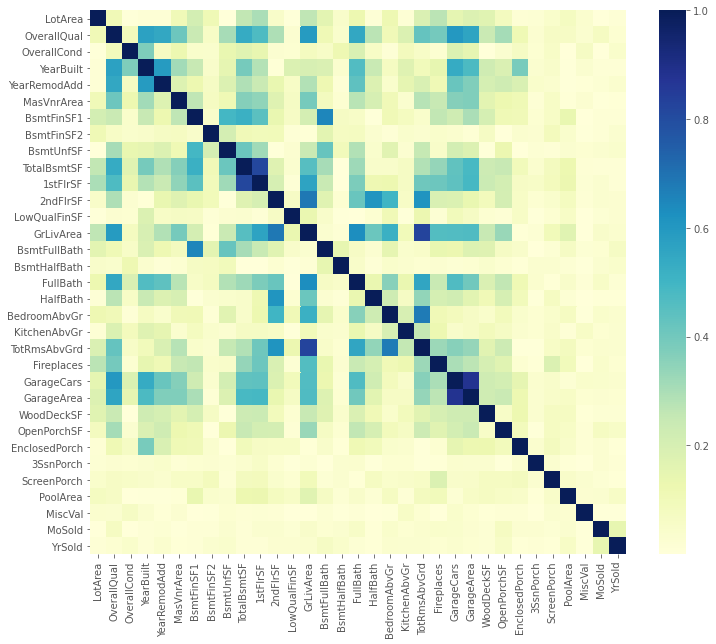

In [10]:
plt.figure(figsize=(12,10))
cor = df.drop('SalePrice',1).corr().apply(lambda x:np.abs(x))
sns.heatmap(cor, annot=False, cmap ="YlGnBu")

In [22]:
# finding the correlation between features and 'SalePrice' (target)

# features = df.corr().apply(lambda x: np.abs(x)).loc[['SalePrice']].columns
# corr_ = df.corr().apply(lambda x: np.abs(x)).loc[['SalePrice']].values.reshape(34,)

features = df.corr().loc[['SalePrice']].columns
corr_ = df.corr().loc[['SalePrice']].values.reshape(34,)

In [23]:
features = pd.Series(features)
corr_ = pd.Series(corr_)

In [24]:
corr_w_target = pd.concat([features[:33],corr_[:33]], axis=1)
corr_w_target.columns = ['Features','Correlation']

In [25]:
corr_w_target = corr_w_target.set_index('Features')

Text(0.5, 0, 'Correlation Coefficient')

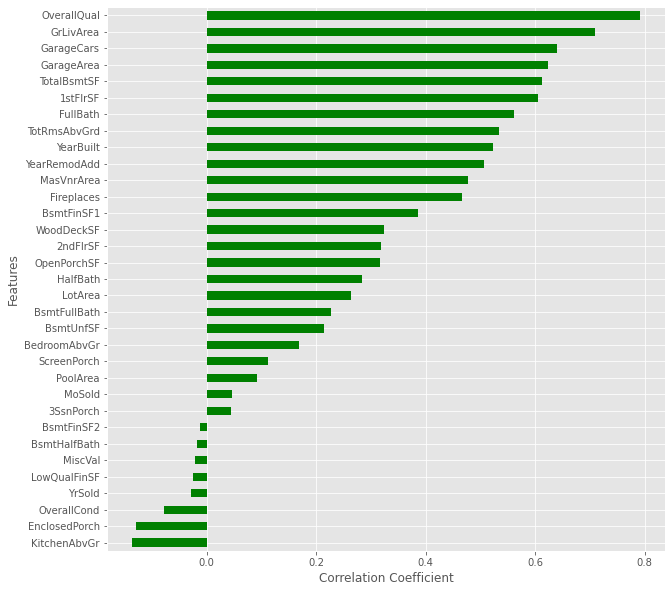

In [26]:
plt.figure(figsize = (10,10))
corr_w_target.Correlation.sort_values().plot(kind = 'barh',color = 'green')
plt.xlabel('Correlation Coefficient')